## Metric based selection

- Use one model per feature 
- Predict 
- Evaluate 
- Rank 
- Select !




In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split



In [21]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/FeatureSelection/train_titanic.csv')

In [23]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
y = data.Survived
X = data.drop(columns=['Survived'])


In [25]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Analyze

In [27]:
X = X.drop(columns=['Name', 'Ticket'])

In [28]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,NaN,S


In [29]:
X.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
temp = encoder.fit_transform(X['Sex'].values.reshape(-1,1))
X['Sex'] = temp
X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,NaN,S
1,2,1,0,38.0,1,0,71.2833,C85,C
2,3,3,0,26.0,0,0,7.9250,NaN,S
3,4,1,0,35.0,1,0,53.1000,C123,S
4,5,3,1,35.0,0,0,8.0500,NaN,S


In [31]:
def impute(df, columns, dft):
    df_temp = df.copy()
    for column in columns:
      df_temp[column] = df_temp[column].apply(lambda x: np.random.choice(dft[column].dropna().values) if pd.isnull(x) else x)
    return df_temp

In [32]:
X['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
X = impute(X, ['Embarked'], X)
encoder = LabelEncoder()
temp = encoder.fit_transform(X['Embarked'].values.reshape(-1,1))
X['Embarked'] = temp
X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,NaN,2
1,2,1,0,38.0,1,0,71.2833,C85,0
2,3,3,0,26.0,0,0,7.9250,NaN,2
3,4,1,0,35.0,1,0,53.1000,C123,2
4,5,3,1,35.0,0,0,8.0500,NaN,2


In [34]:
mapper = {k:i for i, k in enumerate(X['Cabin'].unique(), 0)} 
# mapper[np.nan] = 'M'
X['Cabin'] = X['Cabin'].map(mapper)
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,0,2
1,2,1,0,38.0,1,0,71.2833,1,0
2,3,3,0,26.0,0,0,7.9250,0,2
3,4,1,0,35.0,1,0,53.1000,2,2
4,5,3,1,35.0,0,0,8.0500,0,2


In [35]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [36]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')
X_train = obj.fit_transform(X_train)
X_test = obj.transform(X_test)

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [40]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression()
    ]
texts = [    "DecisionTreeClassifier",
             "KNeighborsClassifier",
             "SVC",
             "LogisticRegression"]

from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score
metrics_cl = [accuracy_score, balanced_accuracy_score, recall_score, precision_score]

In [42]:
clf = classifiers[0]
metric = metrics_cl[1]
scores = []
for feature in X_train.columns:
    clf.fit(X_train[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    scores.append(metric(y_test, y_pred))

In [43]:
# let's add the variable names and order it for clearer visualisation
scores = pd.Series(scores)
scores.index = X_train.columns
scores.sort_values(ascending=False)

Sex            0.721168
Pclass         0.663122
Cabin          0.641987
Fare           0.628616
Embarked       0.556868
PassengerId    0.537575
Parch          0.534423
Age            0.532216
SibSp          0.525946
dtype: float64

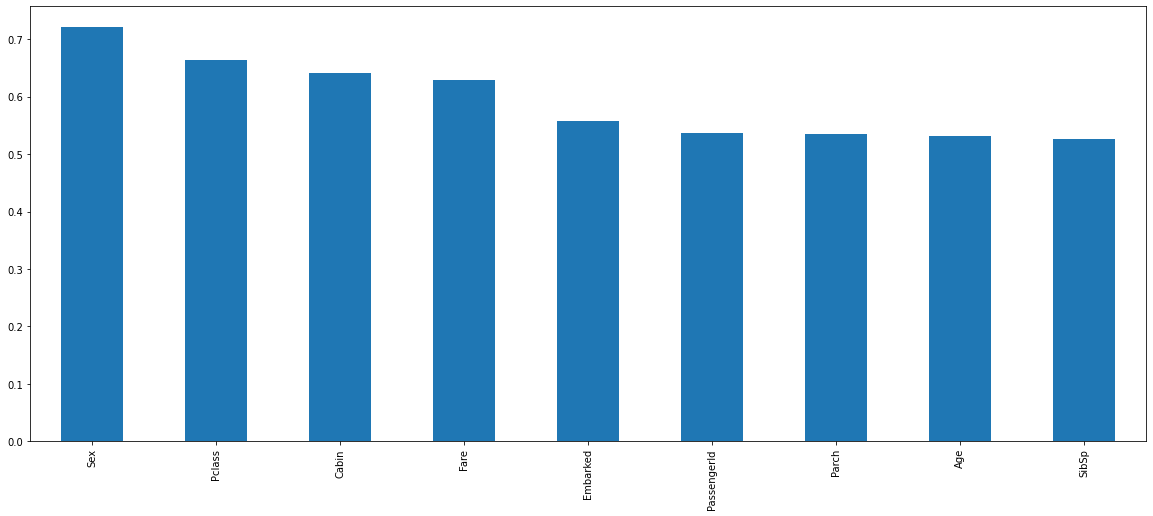

In [45]:
# let's plot
scores.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [48]:
scores[scores > 0.6]

Pclass    0.663122
Sex       0.721168
Fare      0.628616
Cabin     0.641987
dtype: float64

### Regression

In [73]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/FeatureSelection/train_house.csv')

In [74]:
data.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [75]:
y = data.SalePrice
X = data.drop(columns=['SalePrice'])


In [76]:
X.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [77]:
X['SaleCondition'].dtype

dtype('O')

In [78]:
objs = []
nums = []
for i in X.columns:
  if X[i].dtype == 'O':
    objs.append(i)
  else:
    nums.append(i)

In [79]:
na_objs = []
na_nums = []
for i in X.columns:
  if (X[i].isnull().sum() > 0):
    print(i, " ", X[i].isnull().sum())
    if X[i].dtype == 'O':
      na_objs.append(i)
    else:
      na_nums.append(i)

LotFrontage   259
Alley   1369
MasVnrType   8
MasVnrArea   8
BsmtQual   37
BsmtCond   37
BsmtExposure   38
BsmtFinType1   37
BsmtFinType2   38
Electrical   1
FireplaceQu   690
GarageType   81
GarageYrBlt   81
GarageFinish   81
GarageQual   81
GarageCond   81
PoolQC   1453
Fence   1179
MiscFeature   1406


In [80]:
na_nums

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [81]:
na_objs

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [82]:
def impute(df, columns, dft):
    df_temp = df.copy()
    for column in columns:
      df_temp[column] = df_temp[column].apply(lambda x: np.random.choice(dft[column].dropna().values) if pd.isnull(x) else x)
    return df_temp

In [83]:
X = impute(X,na_nums + na_objs , X)

In [84]:
X.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [85]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,TA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Ex,GdPrv,Othr,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Fa,GdWo,Shed,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Fa,GdPrv,Shed,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Fa,MnPrv,Shed,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [86]:
for col in objs:
  mapper = {k:i for i, k in enumerate(X[col].unique(), 0)} 
  X[col] = X[col].map(mapper)

X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,0,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,0,0,0,0,2,2008,0,0
1,2,20,0,80.0,9600,0,0,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,0,1,0,0,1976.0,0,2,460,0,0,0,298,0,0,0,0,0,1,1,1,0,5,2007,0,0
2,3,60,0,68.0,11250,0,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,0,0,2001.0,0,2,608,0,0,0,0,42,0,0,0,0,1,0,1,0,9,2008,0,0
3,4,70,0,60.0,9550,0,0,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,1,1,1998.0,1,3,642,0,0,0,0,35,272,0,0,0,1,2,1,0,2,2006,0,1
4,5,60,0,84.0,14260,0,0,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,0,1,0,0,2000.0,0,3,836,0,0,0,192,84,0,0,0,0,2,2,1,0,12,2008,0,0


In [87]:
objs_oh = []
for col in objs:
  if len(X[col].unique())>2:
    objs_oh.append(col)

objs_oh

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [88]:
len(X.columns)

80

In [89]:
for i in objs_oh:
  X = pd.concat([X, pd.get_dummies(X[i], prefix = i, drop_first=True)], axis=1)

In [90]:
X = X.drop(columns=objs_oh)

In [91]:
len(X.columns)

246

In [92]:
# from sklearn.decomposition import PCA
# obj = PCA()
# X   = obj.fit_transform(X)

In [93]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [94]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
regressors = [
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    SVR(),
    RandomForestRegressor()
    ]
texts = [    "DecisionTreeRegressor",
              "KNeighborsRegressor",
              "SVR",
              "RandomForestRegressor"]


from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

metrics_r = [mean_squared_error, r2_score, explained_variance_score]

In [103]:
mdl = regressors[0]
metric = metrics_r[0]
scores = []
for feature in X_train.columns:
    mdl.fit(X_train[feature].to_frame(), y_train)
    y_pred = mdl.predict(X_test[feature].to_frame())
    scores.append(metric(y_test, y_pred))

In [104]:
# let's add the variable names and order it for clearer visualisation
scores = pd.Series(scores)
scores.index = X_train.columns
scores.sort_values(ascending=False)

BsmtUnfSF      1.050213e+10
Id             9.615602e+09
LotArea        7.583769e+09
1stFlrSF       7.055792e+09
BsmtFinSF1     6.814698e+09
                   ...     
GarageArea     3.762999e+09
ExterQual_1    3.761701e+09
YearBuilt      3.747082e+09
GarageCars     3.341690e+09
OverallQual    2.010022e+09
Length: 246, dtype: float64

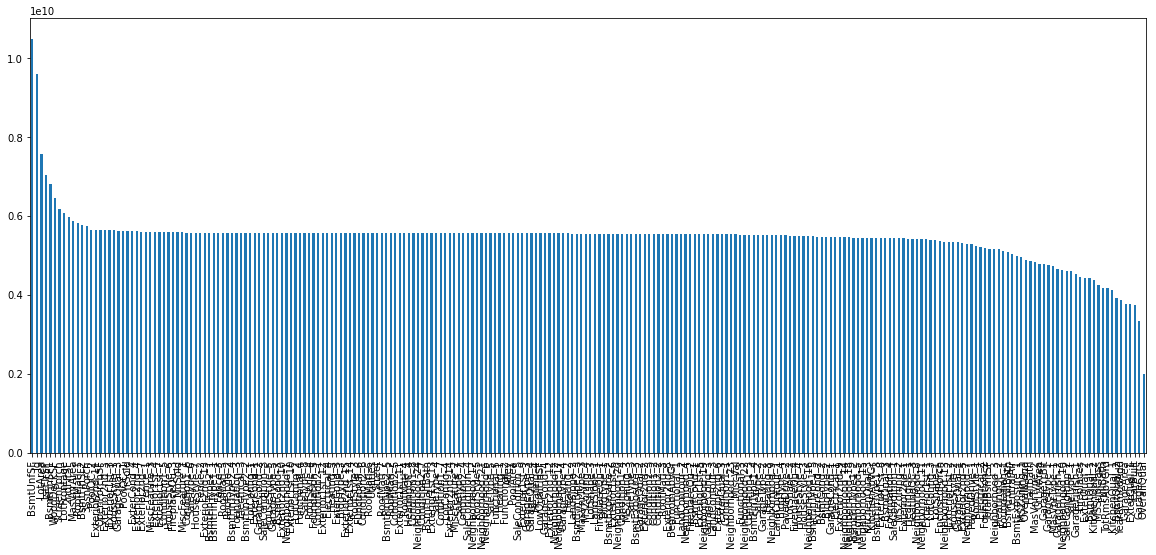

In [105]:
# let's plot
scores.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [110]:
len(scores[scores < (sum(scores)/(len(scores)))])

63

In [111]:
len(scores)

246

In [112]:
scores.sort_values(ascending=True)

OverallQual    2.010022e+09
GarageCars     3.341690e+09
YearBuilt      3.747082e+09
ExterQual_1    3.761701e+09
GarageArea     3.762999e+09
                   ...     
BsmtFinSF1     6.814698e+09
1stFlrSF       7.055792e+09
LotArea        7.583769e+09
Id             9.615602e+09
BsmtUnfSF      1.050213e+10
Length: 246, dtype: float64